In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns

/Users/ethender/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<h1>Task1: Data pre-processing and data exploration</h1>

<p><b>a)</b> Use Pandas to load both trainingSet.csv and testingSet.csv (1 mark).
Loaded the Training set and Test set</p>

In [2]:
trainingSet = pd.read_csv('trainingSet.csv')
testSet = pd.read_csv('testingSet.csv')
trainingSet

,LOC_BLANK,BRANCH_COUNT,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CYCLOMATIC_COMPLEXITY,DESIGN_COMPLEXITY,ESSENTIAL_COMPLEXITY,LOC_EXECUTABLE,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,LOC_TOTAL,DEFECTIVE
0,0,1,0,0,1,1,1,7,12,19,7,4,9,1
1,2,1,0,0,1,1,1,6,8,8,6,4,10,-1
2,3,9,0,3,1,1,1,24,22,33,13,11,33,1
3,0,1,0,0,1,1,1,1,1,2,1,2,4,-1
4,0,1,0,0,1,1,1,7,10,15,8,8,12,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,12,39,6,20,20,12,7,91,140,200,61,20,131,-1
360,22,31,0,7,16,13,11,101,130,192,57,26,132,1
361,0,1,0,0,1,1,1,3,3,5,3,5,5,-1
362,4,7,0,11,4,4,1,23,23,38,14,10,40,-1


<p>
      <b>Categorical Data</b><br>
      <ul>
        <li>DEFECTIVE</li>
      </ul>  <br>
      <b>Numerical Data</b><br>
      <ul>
        <li>Loc_Blank</li>
        <li>Branch_count</li>
        <li>LOC_CODE_AND_COMMENT</li>
        <li>LOC_CODE_AND_COMMENT</li>
        <li>LOC_COMMENTS</li>
        <li>CYCLOMATIC_COMPLEXITY</li>
        <li>DESIGN_COMPLEXITY</li>
        <li>ESSENTIAL_COMPLEXITY</li>
        <li>LOC_EXECUTABLE</li>
        <li>NUM_OPERANDS</li>
        <li>NUM_OPERATORS</li>
        <li>NUM_UNIQUE_OPERANDS</li>
        <li>NUM_UNIQUE_OPERATORS</li>
        <li>LOC_TOTAL</li>
      </ul>
    </p>

  <p>
      <b>b)</b> Find the number of patterns in each class for both loaded data sets using Python 
    </p>

Dividing Independent data and dependent data

In [3]:
trainX = trainingSet.loc[:,:'LOC_TOTAL']
trainY = trainingSet.loc[:,'DEFECTIVE']
testX = testSet.loc[:,:'LOC_TOTAL']
testY = testSet.loc[:,'DEFECTIVE']

In [4]:
trainPatternCount = [len(trainY.loc[trainY == -1]),len(trainY.loc[trainY == 1])]
testPatternCount = [len(testY.loc[testY == -1]),len(testY.loc[testY == 1])]
print('Train \n'+'Non-Defective:\t'+str(trainPatternCount[0])+"\nDefective:\t"+str(trainPatternCount[1]))
print('Test \n'+'Non-Defective:\t'+str(testPatternCount[0])+"\nDefective:\t"+str(testPatternCount[1]))

Train 
Non-Defective:	182
Defective:	182
Test 
Non-Defective:	68
Defective:	68


<p>
      <b>c)</b> Choose an attribute and generate a boxplot for the two classes in the training set
    </p>

<p>
      Using Box Plot for <b><q>Design Complexity</q></b> for defective and non defective <br><br>
    <b>Analysis</b>
      <ul>
        <li>After looking into the boxplot. Defective has more median than the Non-Defective.</li>
        <li>Looking Non-Defective has more outliers than the Defective.</li>
      </ul>
    </p>

(0, 40)

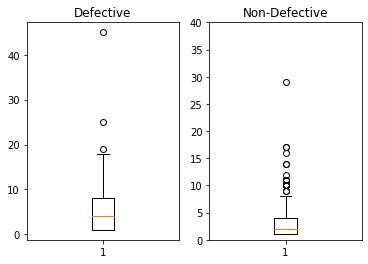

In [5]:
defectTrain = trainX.iloc[np.where(trainY == 1)]
ndefectTrain = trainX.iloc[np.where(trainY == -1)]
plt.subplot(1,2,1)
plt.boxplot(defectTrain.loc[defectTrain.index,'DESIGN_COMPLEXITY'])
plt.title('Defective')
plt.subplot(1,2,2)
plt.boxplot(ndefectTrain.loc[ndefectTrain.index,'DESIGN_COMPLEXITY'])
plt.title('Non-Defective')
plt.ylim(0,40)

<p>
    <b>d)</b> Show one scatter plot, that is, one feature against another feature. It is your choice to show which
two features you want to use. You need to use the training set.
  </p>

  <p>
    Scatter plot against Design <b>complexity vs CYCLOMATIC_COMPLEXITY</b><br><br>
<b>Analysis</b><br>
    As the <b>Design Complexity</b> increases  <b>Cyclomatic Complexity</b> as also increases.
Data is showing <b><q>Linear</q></b> growth.
  </p>

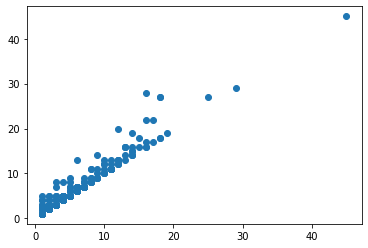

In [6]:
plt.scatter(trainX.loc[:,'DESIGN_COMPLEXITY'],trainX.loc[:,'CYCLOMATIC_COMPLEXITY'])

<p>
    <b>e)</b> Divide the original training set into a smaller training set (II) and a validation set. In this task, you
need to use 55% of total training data points as the validation set.
  </p>

<p>
  <b>Dividing Training Set<br>
    <table>
      <tr>
        <td>Training set</td>
        <td>45%</td>
      </tr>
      <tr>
        <td>Validation set</td>
        <td>55%</td>
      </tr>
    </table>
    </b> 
</p>

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
code_Training_X,code_Validation_X,code_training_Y,code_Validation_Y = train_test_split(trainX,trainY,test_size=0.55,random_state=42)

<h1>
Task 2: Do a principal component analysis </h1>

<p><b>a)</b> Perform a PCA analysis on the original training data set.</p>

In [9]:
pcColumnNames = []
for i in range(1,14):
    pcColumnNames.append('PC'+str(i))

In [10]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
scalar = StandardScaler()
normalised_data = scalar.fit_transform(trainX)
pca = PCA(n_components=13)
codeTrainPCA = pca.fit_transform(normalised_data)
principal_component_DF = pd.DataFrame(data=codeTrainPCA,columns=pcColumnNames)
principal_component_DF.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
359,7.744635,5.923184,4.650574,-0.171783,0.700800,0.108545,-0.796502,1.158606,0.055608,-0.717879,-0.168391,-0.105099,-0.022531
360,7.144156,-0.566062,-0.789857,-1.044655,-1.185891,-0.799060,0.715051,-0.139595,-0.204545,-0.243865,-0.034647,0.015533,-0.025846
361,-2.772474,0.012934,0.045608,0.477666,-0.147097,-0.176938,0.022598,0.063324,0.101304,0.028445,0.012273,0.002511,-0.020033
362,-0.527739,0.975864,-0.996385,0.700515,-0.265846,0.694807,-0.146325,0.256976,-0.026150,-0.035737,-0.007242,-0.012170,-0.008238
363,1.813310,0.399288,0.804280,-0.605968,-0.012705,-0.647596,0.092590,-0.034235,-0.324230,0.034798,0.060096,0.026300,0.044582


<p><b>b)</b> Plot a scree plot to report variances captured by each principal component.</p>

<h3>Analysis:</h3>
  <p>
<ul>
  <li>As PCA showing the <b>PC1</b> has the highest variance.</li>
  <li>From <b>PC2 to Rest</b> has a decreasing towards zero variances. This means data highly clustered near the origin.</li>
  <li>Some Outliers could be PC1.</li>
</ul>
  </p>

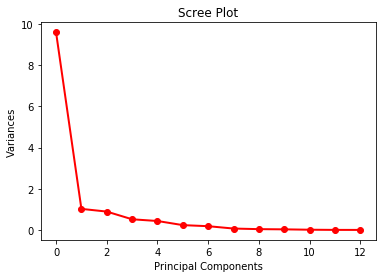

In [11]:
plt.plot(pca.explained_variance_, 'ro-', linewidth=2);
plt.xlabel('Principal Components')
plt.ylabel('Variances')
plt.title('Scree Plot');

<p><b>c)</b> Project the test set on the same PCA space produced by the original training dataset.</p>

In [14]:
test_normalised = scalar.transform(testX)
codeTestPCA = pca.transform(test_normalised)
pc_test_Df = pd.DataFrame(data=codeTestPCA,columns=pcColumnNames)
pc_test_Df.tail()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
131,1.034102,-0.243008,0.533408,1.061600,-0.557433,0.281436,0.350733,-0.050054,-0.036203,-0.114006,-0.036889,-0.032406,-0.000904
132,0.483948,-0.155701,-0.610081,-0.277761,0.117022,0.128786,-0.353443,-0.110827,0.075138,-0.059187,-0.014524,-0.010403,0.002919
133,-2.183372,-0.066159,0.431514,0.251857,0.436095,-0.237565,-0.082033,0.024228,0.056037,0.040288,0.030606,-0.015921,0.000813
134,-1.989296,-0.117301,0.456072,0.170506,0.276917,-0.238848,-0.077496,-0.018316,0.052466,0.035051,0.019483,-0.035457,-0.000553
135,-1.390092,0.016453,-0.194384,-0.071961,-0.063987,-0.060984,-0.364613,0.088454,-0.028664,-0.052332,0.013309,0.038434,0.001271


<p>
    <b>d)</b> Plot two subplots in one figure: one for the training data in the PC1 and PC2 projection space and
label the data in the picture according to its class; the other one for the test data in the same PCA space and label the data in the picture according to its class
  </p>

<p>
    <b>Analysis</b><br>
    After implementing the <b>PCA</b> on both training and test data. <br/>
    <ol>
        <li>Defective has been more wide spread.</li>
        <li>Non-Defective has been clustered Together. Some outliers also there. But not wide as much defective.</li>
        </ol>
</p>

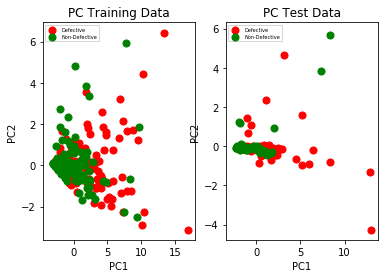

In [15]:
# Training Data
colors = ['r','g']
targets = [1,-1]
legends = ['Defective','Non-Defective']
plt.subplot(1,2,1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC Training Data')
for target, color in zip(targets,colors):
    indicesToKeep = trainingSet['DEFECTIVE'] == target
    plt.scatter(principal_component_DF.loc[indicesToKeep, 'PC1']
               , principal_component_DF.loc[indicesToKeep, 'PC2'], c = color, s = 50)
plt.legend(legends,prop={'size': 5})
# Test Data
plt.subplot(1,2,2)
colors = ['r','g']
targets = [1,-1]
legends = ['Defective','Non-Defective']
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC Test Data')
for target, color in zip(targets,colors):
    indicesToKeep = testSet['DEFECTIVE'] == target
    plt.scatter(pc_test_Df.loc[indicesToKeep, 'PC1']
               , pc_test_Df.loc[indicesToKeep, 'PC2'], c = color, s = 50)
plt.legend(legends,prop={'size': 5});

<h1>Task 3: Do a classification using the Naïve Bayes Classification model </h1>

<p>
    Train the model using the original training set and report the performance on the test set including accuracy rate.
  </p>

<h3>Analysis</h3>
  <p>
    After Implementing the GaussianNB. The accuracy rate was 62%. It can become better after training more data.
  </p>

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [17]:
nb = GaussianNB()
nb.fit(trainX,trainY)

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
predicted_Y_Test_values = nb.predict(testX)

In [19]:
print('Accuracy: ',metrics.accuracy_score(testY,predicted_Y_Test_values).round(2))

Accuracy:  0.62


<h1>Task 4: Investigate how the number of features in the training dataset affects the model performance on the validation set</h1>

<p>
    <b>a)</b> Use the training set (II) to train 13 Naïve Bayes Classification models, with 13 different feature sets. That is: the first one is to use the 1st feature only; the second one is to use the 1st and the 2nd features; the third one is to use the 1st, 2nd, and 3rd features, the fourth one is to use the first 4 features, and so on.<br>
Measure the accuracy rate on both the training set and the validation set. Report the results by plotting them in a figure: that is, a plot of the accuracy rate against the number of features used in each model. There should be two curves in this figure: one for the training set (II); the other one for the validation set.
  </p>

<p>
    <b>Comment:</b>
  Task suggests needing to show Training Data and Validation Data Accuracies. Further, I have divided Training into 2 parts. One model for learning and another one for Testing the model predictions. Along with validation set accuracy as well.
</p>

In [20]:
trainset_x_1,trainset_x_2,trainset_y_1,trainset_y_2 = train_test_split(code_Training_X,code_training_Y,test_size=0.50,random_state=42)

In [21]:
trainAccuracy = []
validAccuracy = []
for i in range(1,14):
    nb = GaussianNB()
    nb.fit(trainset_x_1.iloc[:,:i],trainset_y_1)
    trainAccuracy.append(metrics.accuracy_score(trainset_y_2,nb.predict(trainset_x_2.iloc[:,:i])))
    validAccuracy.append(metrics.accuracy_score(code_Validation_Y,nb.predict(code_Validation_X.iloc[:,:i])))

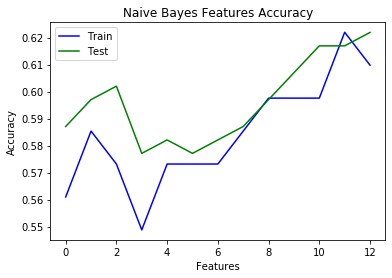

In [22]:
plt.plot(trainAccuracy,'b-',label='Train')
plt.plot(validAccuracy,'g-',label='Validation')
plt.xlabel('Features')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Features Accuracy')
plt.legend(['Train','Test'],prop={'size': 10});

<p><b>b)</b> Report what is the best number of features you would like to use in this work and explain why you choose it. Write it down in your Jupyter notebook.</p>

<p>
    <b>Features Selection</b><br>
    <ul>
      <li>As PCA shows, principal components has not much variated. This means Only Some features have derived the Defective and Non-Defective.</li>
      <li>After Gaussian Naive Bayes implementing the features, only 8 features leading 60% of accuracy.</li>
      <li>So, For the training model, 8 features will enough to predict up to 60% on a testing test. The prediction rate can be increased if implying more on more data.</li>
    </ul>
  </p>

<p>
    <b>c)</b> Use the selected number of features to train the model and report the performance on the test set.
  </p>

<h3>Analysis</h3>
  <p>
    <ul>
      <li>After implementing the Gaussian Naive Bayes on the first eight features. The accuracy rate reported 58%.</li>
      <li>It is near what we have decided on the earlier features selections. It can be improved by consistency monitoring and learning the model.</li>
    </ul>
  </p>

In [23]:
nb = GaussianNB()
nb.fit(trainX.loc[:,:'LOC_EXECUTABLE'],trainY)
results = nb.predict(testX.loc[:,:'LOC_EXECUTABLE'])
accuracy = metrics.accuracy_score(testY,results).round(2)
print('Accuracy For Naive Bayes: ',str(accuracy))

Accuracy For Naive Bayes:  0.58


<h1>Task 5: Summarize your findings, write your conclusions using critical thinking (no more than 100 words) and write it down in your Jupyter notebook.</h1>

<h1>Observations</h1>

<p>
  <b>Explore the data</b><br><br>
  <ul>
    <li>Looking into the Boxplot on the Defective has more median. This has been more diverse than Non-Defective.</li>
    <li>Making Scatter Plot on design complexity and cyclomatic complexity has linear growth between them.</li>
  </ul><br><br>
  <b>PCA</b>
  <ul>
    <li>Principal Components has not much variated.</li>
    <li>The only PC1 has a high variance. This PC1 can be outliers.</li>
    <li>Moreover, a Scatter plot shows. Defective items have more outspread than Non-Defective.</li>
  </ul><br><br>
  <b>Naive Bayes</b>
  <ul>
    <li>After the accuracies test, 8 Features will lead to a 60% prediction performance. It can be an optimal fit. Any more features addition can lead to overfitting the model.</li>
    <li>After preparing the model with 8 features to predict the test set. Accuracy will be 58%. It can be improved by providing more training data to learn. </li>
  </ul>
</p>